In [3]:
import pandas as pd
import numpy as np
from astropy.io import fits,ascii
from astropy.coordinates import SkyCoord,Distance,Angle,match_coordinates_sky,match_coordinates_3d
from astropy.constants import M_sun
from astropy.table import QTable,join,Table
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9
from matplotlib.colors import LogNorm
import warnings
import seaborn as sns 

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\Chinmay A\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chinmay A\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Chinmay A\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


TNS Survey Data containing TDE, TDE-H + He



In [4]:
tns_tde = pd.read_csv('tns_search_tde.csv')
tns_tde1 = pd.read_csv('tns_search_tde1.csv')
tns2 = pd.read_csv('tns_search_tdehhe.csv')
tns_complete_list = pd.concat([tns_tde,tns_tde1,tns2])
#tns_complete_list
tns_complete_list.to_csv('tde_complete.csv')
#tns_tde

In [5]:
data_tns = tns_complete_list[['Name','RA','DEC','Redshift','Obj. Type']]
#data_tns

In [6]:
data_tns

,Name,RA,DEC,Redshift,Obj. Type
0,AT 2023cvb,19:14:25.680,+41:40:09.28,0.071000,TDE
1,AT 2023clx,11:40:09.397,+15:19:38.54,NaN,TDE
2,AT 2022wtn,23:23:23.778,+10:41:07.99,0.049000,TDE
3,AT 2022upj,00:23:56.846,-14:25:23.22,0.054000,TDE
4,AT 2022pna,01:41:55.550,-03:17:22.60,0.095000,TDE
...,...,...,...,...,...
11,AT 2018dyb,16:10:58.774,-60:55:23.16,0.018000,TDE
12,AT 2018bsi,08:15:26.621,+45:35:31.95,0.051000,TDE
13,AT 2018zr,07:56:54.537,+34:15:43.61,0.071000,TDE
14,AT 2016fnl,00:29:57.042,+32:53:37.51,0.016328,TDE


In [7]:
data_tns_qt= QTable.from_pandas(data_tns)
#data_tns_qt

In [8]:
z = data_tns_qt['Redshift']*cu.redshift
data_tns_qt["Distance"] = z.to(u.Mpc, cu.redshift_distance(WMAP9, kind="comoving"))
data_tns_qt
# z.to(u.Mpc, u.doppler_redshift()) 

# df_tns_pos = pd.DataFrame(data_tns['RA'],data_tns['DEC'],d)
# df_tns_pos

c:\Users\Chinmay A\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2411: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)


Name,RA,DEC,Redshift,Obj. Type,Distance
,,,,,Mpc
str11,str12,str12,float64,str8,float64
AT 2023cvb,19:14:25.680,+41:40:09.28,0.071,TDE,302.29868043697275
AT 2023clx,11:40:09.397,+15:19:38.54,--,TDE,0.0
AT 2022wtn,23:23:23.778,+10:41:07.99,0.049,TDE,209.6566147365348
AT 2022upj,00:23:56.846,-14:25:23.22,0.054,TDE,230.79350990031134
AT 2022pna,01:41:55.550,-03:17:22.60,0.095,TDE,402.29210519009064
AT 2022lri,02:20:08.009,-22:43:15.42,0.032,TDE,137.4334181754939
AT 2022ibq,17:50:35.785,+21:16:29.92,0.395,TDE,1555.0863018405862
AT 2022hvp,09:54:45.240,+55:26:25.37,0.12,TDE,505.25146301291954


In [9]:
    data_tns = data_tns_qt.to_pandas()
    data_tns_nonna = data_tns.dropna()
    len(data_tns_nonna)

64

In [10]:
tns_catalog_dist = QTable.from_pandas(data_tns_nonna)
tns_catalog_dist['RA'] = Angle(tns_catalog_dist['RA'],u.deg)
tns_catalog_dist['DEC'] = Angle(tns_catalog_dist['DEC'],u.deg)
tns_catalog_dist['Distance'] = Distance(tns_catalog_dist['Distance'],u.Mpc)
tns_catalog_dist['Coordinates'] = SkyCoord(tns_catalog_dist['RA'],tns_catalog_dist['DEC'],tns_catalog_dist['Distance'])
len(tns_catalog_dist)

64

In [25]:
tns_data = QTable.from_pandas(data_tns)
tns_data['RA']= Angle(tns_data['RA'],u.hourangle)
tns_data['DEC']= Angle(tns_data['DEC'],u.deg)
tns_data["Coord"] = SkyCoord(tns_data["RA"], tns_data["DEC"])
tns_data['Distance'] = Distance(tns_data['Distance'],u.Mpc)
#tns_data['Coord 3D'] = SkyCoord(tns_data['RA'],tns_data['DEC'],tns_data['Distance'])
len(tns_data)

66

NSA Sloan Data

In [12]:
hdu_list = fits.open('nsa_v0_1_2.fits', memmap=True)
hdu_list.info()

Filename: nsa_v0_1_2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    312   145155R x 143C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, E, E, E, J, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7E, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, J, J, J, 7E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, E, 6A, 23A, 8A, J, D, D]   


In [13]:
hdu  = hdu_list[1]
#hdu.data.columns

In [15]:
data_nsa = QTable.read(hdu)
nsa_data = data_nsa['IAUNAME','RA','DEC','ZDIST','MASS','SERSIC_N']
#data_nsa
nsa_data['RA'] = Angle(nsa_data['RA'],u.deg)
nsa_data['DEC'] = Angle(nsa_data['DEC'],u.deg)
nsa_data['Coordinate'] = SkyCoord(nsa_data['RA'],nsa_data['DEC'])
nsa_data

IAUNAME,RA,DEC,ZDIST,MASS,SERSIC_N,Coordinate
,deg,deg,,,,"deg,deg"
str19,float64,float64,float32,float32,float32,SkyCoord
J094651.40-010228.5,146.71420878660933,-1.0412815695754145,0.020687785,8815395000.0,4.7782097,"146.71420878660933,-1.0412815695754145"
J094631.60-005917.7,146.63173520920705,-0.9883548584122686,0.052030597,1583589900.0,0.91950214,"146.63173520920705,-0.9883548584122686"
J094842.33-002114.4,147.1764469492006,-0.3540304166428786,0.0068420386,98977950.0,2.2755644,"147.1764469492006,-0.3540304166428786"
J094919.08+000144.0,147.32950521628283,0.028894913633412792,0.04747421,17028572000.0,2.1455417,"147.32950521628283,0.028894913633412792"
J094725.62-001626.6,146.85676078112354,-0.27409464401659345,0.021350192,211533090.0,1.4893433,"146.85676078112354,-0.27409464401659345"
J094446.23-004118.2,146.19324131894246,-0.6893913949609716,0.0048225927,51908532.0,1.0075195,"146.19324131894246,-0.6893913949609716"
J094401.87-003832.1,146.00780138386094,-0.6422592232200361,0.005471182,29839562.0,6.0,"146.00780138386094,-0.6422592232200361"
J094622.67-000759.3,146.59449798798227,-0.13314606121936812,0.045040708,2126517800.0,0.8475048,"146.59449798798227,-0.13314606121936812"


In [1]:
nsap_data = nsa_data['IAUNAME','RA','DEC','ZDIST','MASS']
nsap=nsap_data.to_pandas()
count_of_zeros = (nsap['ZDIST'] == 0).sum()
count_of_zeros
list_zeros = np.array(list(np.where(nsap['Z'] == 0)))



NameError: name 'nsa_data' is not defined

In [34]:
# Only for the 3D separation data
#nsa_copy = QTable.read(hdu)
#nsa_data_3d = nsa_copy.remove_rows([145040, 145042, 145048, 145053, 145063, 145081, 145095, 145097,145116, 145126, 145129, 145130, 145131, 145154])
#nsa_data_3d['RA'] = Angle(nsa_data_3d['RA'],u.deg)
#nsa_data_3d['DEC'] = Angle(nsa_data_3d['DEC'], u.deg)
#nsa_rev3d_data['Coordinate'] = SkyCoord(nsa_data_3d['RA'],nsa_data_3d['DEC'])   
#z = nsa_data_3d['Z']*cu.redshift
#nsa_data_3d["Distance"] = z.to(u.Mpc, cu.redshift_distance(WMAP9, kind="comoving"))
#nsa_data_3d['Distance']  = np.abs(nsa_data_3d['Distance'])
#nsa_data_3d['Coordinates 3D'] = SkyCoord(nsa_data_3d['RA'],nsa_data_3d['DEC'],nsa_data_3d['Distance'])   
#nsa_data_3d

In [17]:
nsa_rev3d_data = nsa_data
nsa_rev3d_data['RA'] = Angle(nsa_rev3d_data['RA'],u.deg)
nsa_rev3d_data['DEC'] = Angle(nsa_rev3d_data['DEC'], u.deg)
#nsa_rev3d_data['Coordinate'] = SkyCoord(nsa_rev3d_data['RA'],nsa_rev3d_data['DEC'])   
z = nsa_rev3d_data['ZDIST']*cu.redshift
nsa_rev3d_data["Distance"] = z.to(u.Mpc, cu.redshift_distance(WMAP9, kind="comoving"))
nsa_rev3d_data['Distance']  = np.abs(nsa_rev3d_data['Distance'])
nsa_rev3d_data['Coordinates 3D'] = SkyCoord(nsa_rev3d_data['RA'],nsa_rev3d_data['DEC'],nsa_rev3d_data['Distance'])   
nsa_rev3d_data

IAUNAME,RA,DEC,ZDIST,MASS,SERSIC_N,Coordinate,Distance,Coordinates 3D
,deg,deg,,,,"deg,deg",Mpc,"deg,deg,Mpc"
str19,float64,float64,float32,float32,float32,SkyCoord,float64,SkyCoord
J094651.40-010228.5,146.71420878660933,-1.0412815695754145,0.020687785,8815395000.0,4.7782097,"146.71420878660933,-1.0412815695754145",89.06994606504762,"146.71420878660933,-1.0412815695754145,89.06994606504762"
J094631.60-005917.7,146.63173520920705,-0.9883548584122686,0.052030597,1583589900.0,0.91950214,"146.63173520920705,-0.9883548584122686",222.47382681836243,"146.63173520920705,-0.9883548584122686,222.47382681836243"
J094842.33-002114.4,147.1764469492006,-0.3540304166428786,0.0068420386,98977950.0,2.2755644,"147.1764469492006,-0.3540304166428786",29.54659356954924,"147.1764469492006,-0.3540304166428786,29.54659356954924"
J094919.08+000144.0,147.32950521628283,0.028894913633412792,0.04747421,17028572000.0,2.1455417,"147.32950521628283,0.028894913633412792",203.1969668807592,"147.32950521628283,0.028894913633412792,203.1969668807592"
J094725.62-001626.6,146.85676078112354,-0.27409464401659345,0.021350192,211533090.0,1.4893433,"146.85676078112354,-0.27409464401659345",91.90862265727202,"146.85676078112354,-0.27409464401659345,91.90862265727202"
J094446.23-004118.2,146.19324131894246,-0.6893913949609716,0.0048225927,51908532.0,1.0075195,"146.19324131894246,-0.6893913949609716",20.834916644328196,"146.19324131894246,-0.6893913949609716,20.834916644328196"
J094401.87-003832.1,146.00780138386094,-0.6422592232200361,0.005471182,29839562.0,6.0,"146.00780138386094,-0.6422592232200361",23.633692671286962,"146.00780138386094,-0.6422592232200361,23.633692671286962"
J094622.67-000759.3,146.59449798798227,-0.13314606121936812,0.045040708,2126517800.0,0.8475048,"146.59449798798227,-0.13314606121936812",192.88517273175322,"146.59449798798227,-0.13314606121936812,192.88517273175322"


In [36]:
hdu_list.close()

Cross-Matching catalogs

2-D Mapping

In [19]:
nsa_catalog_2d = nsa_data['IAUNAME','Coordinate']
tns_catalog_2d = tns_data['Name','Coord']
len(nsa_catalog_2d)

145155

In [20]:
len(nsa_data['Coordinate'])
len(tns_data['Coord'])

66

In [30]:
idx_sersic, sep2d_sersic, _ = tns_catalog_2d['Coord'].match_to_catalog_sky(nsa_catalog_2d['Coordinate'])
match = nsa_catalog_2d[sep2d_sersic < 1*u.arcsec]

print(len(sep2d_max))
#sep2d_sersic


66


In [46]:
sep2d_sersic = np.absolute(sep2d_sersic)
sep2d_sersic = Angle(sep2d_sersic,u.deg)
#sep2d_sersic

66

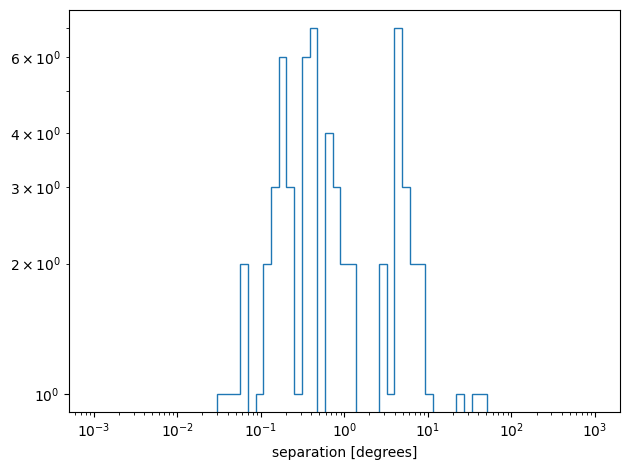

In [56]:
plt.hist(sep2d_sersic.deg, histtype='step', 
         bins=np.logspace(-3, 3,66))
plt.xlabel('separation [degrees]')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
len(sep2d_sersic.deg)

In [42]:
idx_sersic

array([115564,  75016, 116600,  19726, 113030, 113854, 115383, 116552,
       113798, 115632, 137023, 136895, 114144, 114320, 114697,   7448,
       113904,   5217, 119297, 144246, 116552, 136755, 113716, 115424,
       112857, 135898, 114943, 116552, 112871, 114344, 114315, 115153,
       113102, 114128, 114449, 114775, 113218,   7540, 145008, 137108,
       114996, 115258,   7519, 119803, 115007, 114551, 115645,  19779,
         6010, 114564, 116552,   7769, 114959, 113915, 114128,  75016,
       113795, 115384, 114201, 112950, 116286, 114128, 114376, 113798,
       112855, 113837], dtype=int64)

In [43]:
nsa_catalog_matched = nsa_catalog_2d[idx_sersic]
nsa_catalog_matched.columns


<TableColumns names=('IAUNAME','Coordinate')>

In [ ]:
sep_constraint = d2d < max_sep
c_matches = cat_ch1[sep_constraint]
catalog_ch2_matches = cat_ch2[idx[sep_constraint]]

In [48]:
(sep2d_sersic < 1*u.arcsec).sum(), len(tns_catalog_2d)

(0, 66)

In [49]:
(sep2d_sersic < 1*u.arcmin).sum(), len(tns_catalog_2d)

(0, 66)

In [66]:
(sep2d_sersic < 10*u.arcmin).sum()

11

In [85]:
(sep2d_sersic > 10*u.deg).sum()

3

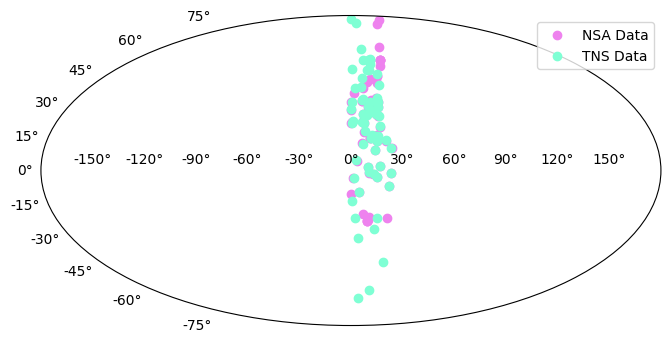

In [92]:
nsa_ra = nsa_catalog_matched['Coordinate'].ra
nsa_dec = nsa_catalog_matched['Coordinate'].dec
tns_ra = tns_catalog_2d['Coord'].ra
tns_dec = tns_catalog_2d['Coord'].dec
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(nsa_ra.radian, nsa_dec.radian,color = 'violet',label = 'NSA Data')
ax.scatter(tns_ra.radian,tns_dec.radian,color = 'aquamarine',label = 'TNS Data')
ax.legend()

3-D Mapping 

In [76]:
nsa_catalog_3d = nsa_rev3d_data['IAUNAME','Coordinates 3D']
tns_catalog_3d = tns_catalog_dist['Name','Coordinates']

In [77]:
idx_sersic, sep2d, sep3d = tns_catalog_3d['Coordinates'].match_to_catalog_sky(nsa_catalog_3d['Coordinates 3D'])
len(sep2d) 

64

In [78]:
sep3d

<Distance [ 217.37990764,  158.96819092,   36.57020502,  308.05176889,
             90.58799926, 1481.87466431,  396.89295314,   52.3562101 ,
            366.73322027,  227.23787069,  271.67778174,  164.1002207 ,
             93.78630156,   45.84555567,  245.59009074,  130.70948173,
            180.70697235,  487.59832025,  103.88714457,  342.68053521,
           1000.5321724 ,  150.67945383,  663.67944092,  360.76705845,
            118.77810747,  569.36174162,   92.24697134,  211.64890333,
            451.86745149,  542.22258956, 1250.35770816,   14.87313379,
             45.96223366,  714.89114933,  404.9275219 ,  446.76480662,
            239.37996009,   58.45005846,   56.0943552 ,  173.20825865,
             48.59476605,  186.13646284,  218.22355066,  306.72638636,
            297.85868402,   50.54712968,  302.48878172,  340.43231006,
            205.95139054,   15.98203396,  338.70179648,   29.12669938,
            158.31441027,   45.72547959,  277.70132085,  779.34529519,
      

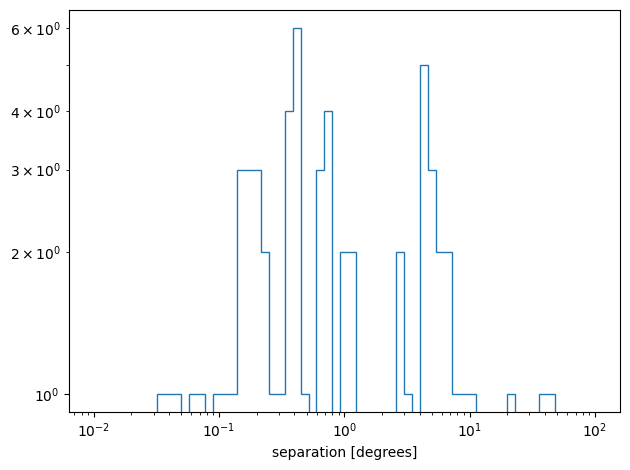

In [79]:
plt.hist(sep2d.deg, histtype='step', 
         bins=np.logspace(-2, 2,64))
plt.xlabel('separation [degrees]')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()


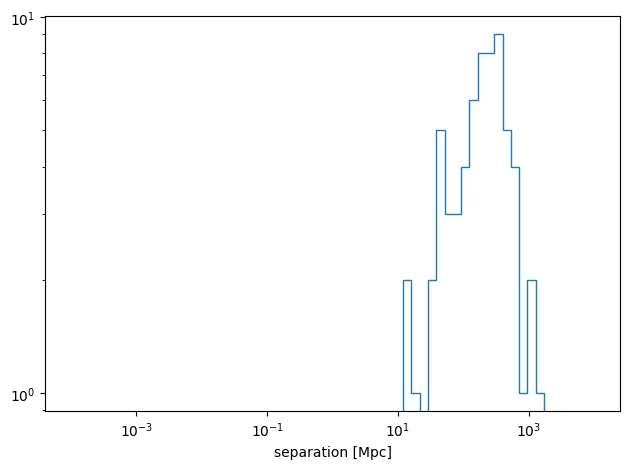

In [80]:
plt.hist(sep3d.Mpc, histtype='step', 
         bins=np.logspace(-4, 4,64))
plt.xlabel('separation [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()


In [81]:
nsa_catalog_matched_3d = nsa_catalog_3d[idx_sersic]

In [87]:
(sep2d > 10*u.deg).sum()

3

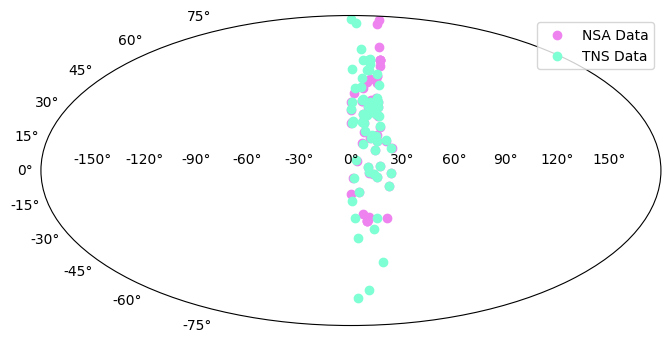

In [90]:
nsa_ra = nsa_catalog_matched_3d['Coordinates 3D'].ra
nsa_dec = nsa_catalog_matched_3d['Coordinates 3D'].dec
tns_ra = tns_catalog_3d['Coordinates'].ra
tns_dec = tns_catalog_3d['Coordinates'].dec
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(nsa_ra.radian, nsa_dec.radian,color = 'violet',label = 'NSA Data')
ax.scatter(tns_ra.radian,tns_dec.radian,color = 'aquamarine',label = 'TNS Data')
ax.legend()